In [23]:
import pandas as pd
import numpy as np
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
import os
import matplotlib.pyplot as plt

os.chdir("C:/Users/UserPro/Gslib_Folder")

In [24]:
df = pd.read_csv("C:/Users/UserPro/Examen_Python_CRP/Dataset_Irregular.csv", sep=";")
df.head()

,Unnamed: 0,X,Y,VA
0,0,200.0,800.0,12.090045
1,1,200.0,600.0,11.696657
2,2,200.0,400.0,8.750095
3,3,200.0,200.0,6.724989
4,4,400.0,800.0,11.010015


In [25]:
df.drop(columns="Unnamed: 0", inplace=True)

In [26]:
df.head()

,X,Y,VA
0,200.0,800.0,12.090045
1,200.0,600.0,11.696657
2,200.0,400.0,8.750095
3,200.0,200.0,6.724989
4,400.0,800.0,11.010015


In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,36.0,501.944444,245.738763,0.000000,350.000000,525.00000,687.500000,990.00000
Y,36.0,446.666667,266.737967,9.000000,200.000000,409.50000,600.000000,949.00000
VA,36.0,7.678176,3.862341,0.682431,4.720342,6.76927,10.259861,17.28426


In [28]:
xmin=0; xmax=1000; ymin=0; ymax=1000; cmap=plt.cm.jet

C:\Users\UserPro\anaconda3\lib\site-packages\geostatspy\GSLIB.py:257: MatplotlibDeprecationWarning: 
The 'verts' parameter of scatter() was deprecated in Matplotlib 3.2 and will be removed two minor releases later. If any parameter follows 'verts', they should be passed as keyword, not positionally.
  im = plt.scatter(


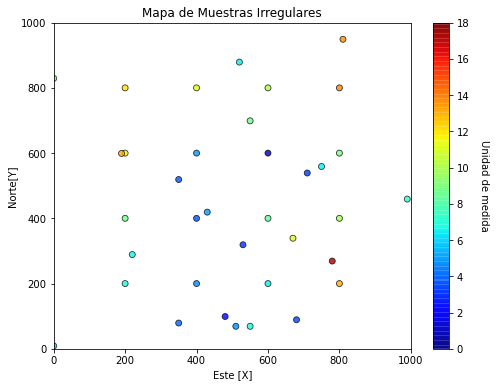

In [29]:
GSLIB.locmap(df,"X","Y","VA",xmin,xmax,ymin,ymax,0,18,"Mapa de Muestras Irregulares", "Este [X]", "Norte[Y]","Unidad de medida",cmap,"Visualizacion de Muestras")
plt.show()

In [176]:
tmin=-999;tmax=999;xlag=100;xtol=50;nlag=10;atol=22.5;bandwh=100;isill=0

In [177]:
lag000,vario000,np000=geostats.gamv(df,"X","Y","VA",tmin,tmax,xlag,xtol,nlag,0,atol,bandwh,isill)
lag090,vario090,np090=geostats.gamv(df,"X","Y","VA",tmin,tmax,xlag,xtol,nlag,90,atol,bandwh,isill)
lag045,vario045,np045=geostats.gamv(df,"X","Y","VA",tmin,tmax,xlag,xtol,nlag,45,atol,bandwh,isill)
lag135,vario135,np135=geostats.gamv(df,"X","Y","VA",tmin,tmax,xlag,xtol,nlag,135,atol,bandwh,isill)

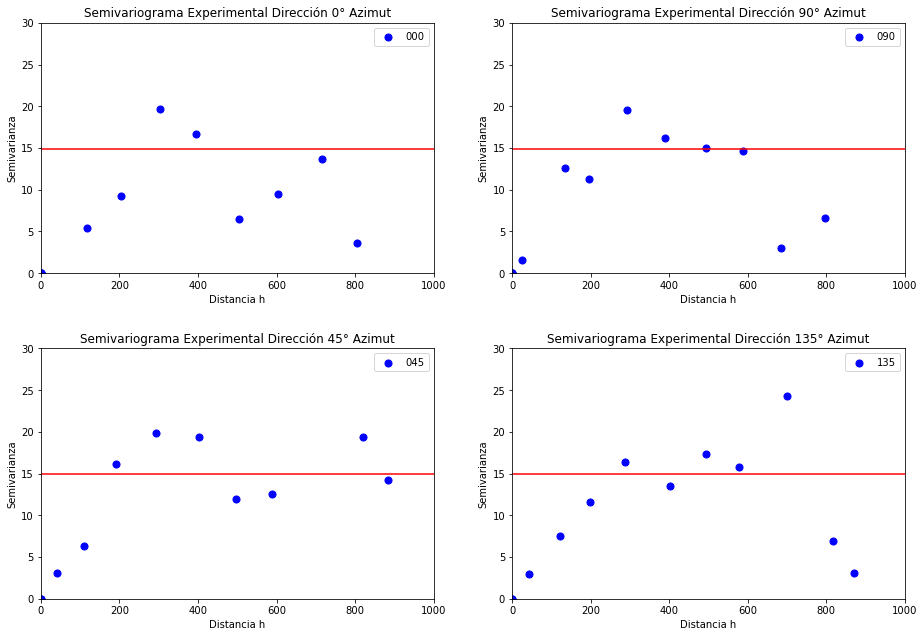

In [178]:
plt.subplot(221)
plt.scatter(lag000,vario000,s=50,marker="o",color="blue",label="000")
plt.plot([0,1000],[14.92,14.92],color="red")
plt.xlabel("Distancia h")
plt.ylabel("Semivarianza")
plt.title("Semivariograma Experimental Dirección 0° Azimut")
plt.ylim(0,30)
plt.xlim(0,1000)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::],labels[::])

plt.subplot(222)
plt.scatter(lag090,vario090,s=50,marker="o",color="blue",label="090")
plt.plot([0,1000],[14.92,14.92],color="red")
plt.xlabel("Distancia h")
plt.ylabel("Semivarianza")
plt.title("Semivariograma Experimental Dirección 90° Azimut")
plt.ylim(0,30)
plt.xlim(0,1000)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::],labels[::])

plt.subplot(223)
plt.scatter(lag045,vario045,s=50,marker="o",color="blue",label="045")
plt.plot([0,1000],[14.92,14.92],color="red")
plt.xlabel("Distancia h")
plt.ylabel("Semivarianza")
plt.title("Semivariograma Experimental Dirección 45° Azimut")
plt.ylim(0,30)
plt.xlim(0,1000)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::],labels[::])

plt.subplot(224)
plt.scatter(lag135,vario135,s=50,marker="o",color="blue",label="135")
plt.plot([0,1000],[14.92,14.92],color="red")
plt.xlabel("Distancia h")
plt.ylabel("Semivarianza")
plt.title("Semivariograma Experimental Dirección 135° Azimut")
plt.ylim(0,30)
plt.xlim(0,1000)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::],labels[::])

plt.subplots_adjust(left=0, bottom=0, right=2, top=2, hspace=0.3, wspace=0.2)
plt.show()

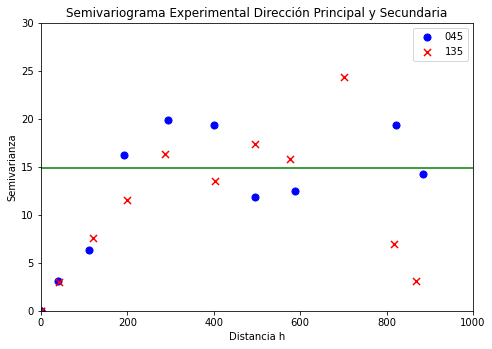

In [179]:
plt.subplot(111)
plt.scatter(lag045,vario045,s=50,marker="o",color="blue",label="045")
plt.scatter(lag135,vario135,s=50,marker="x",color="red",label="135")
plt.plot([0,1000],[14.92,14.92],color="green")
plt.xlabel("Distancia h")
plt.ylabel("Semivarianza")
plt.title("Semivariograma Experimental Dirección Principal y Secundaria")
plt.ylim(0,30)
plt.xlim(0,1000)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::],labels[::])

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0.3, wspace=0.2)
plt.show()

Gamma(h)= 19 esf(600,300) Azimut de anisotropia o Eje mayor 135°

In [190]:
vario_kri=GSLIB.make_variogram(nug=0,nst=1,it1=1,cc1=19,azi1=135,hmaj1=600,hmin1=300)

 make_variogram Warning: sill does not sum to 1.0, do not use in simulation 


In [198]:
xmn=0;ymn=0;ysiz=5;xsiz=5;nx=200;ny=200;nxdis=1;nydis=1;ndmin=3;ndmax=12;radius=400;ktype=1;skmean=np.nan

In [199]:
kmap, vmap=geostats.kb2d(df,"X","Y","VA",tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,ndmin,ndmax,radius,ktype,skmean,vario_kri)

  Estimated   40000 blocks 
      average   8.45235708843429  variance  8.605184867244404


C:\Users\UserPro\anaconda3\lib\site-packages\geostatspy\GSLIB.py:462: MatplotlibDeprecationWarning: 
The 'verts' parameter of scatter() was deprecated in Matplotlib 3.2 and will be removed two minor releases later. If any parameter follows 'verts', they should be passed as keyword, not positionally.
  im = plt.scatter(


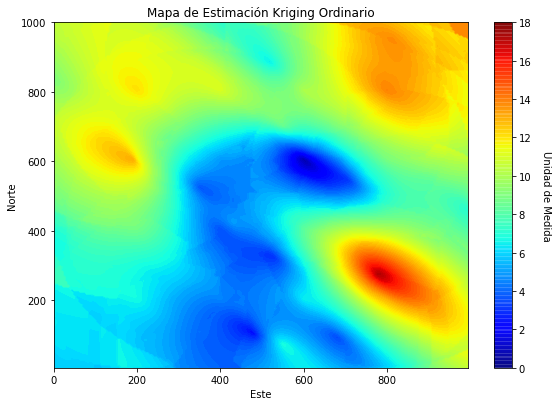

In [200]:
plt.subplot(111)

GSLIB.pixelplt_st(kmap,0,1000,0,1000,5,0,18,"Mapa de Estimación Kriging Ordinario","Este","Norte","Unidad de Medida",cmap)

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1.2, hspace=0.2, wspace=0.2)

plt.show()

In [201]:
vmap[vmap<0]=0

In [202]:
cvko=1*(np.sqrt(vmap))/kmap

cat_ko=np.where(cvko>0.5,"3",(np.where(cvko<0.25,"1","2")))

cvko.max()

1.2057304410253302

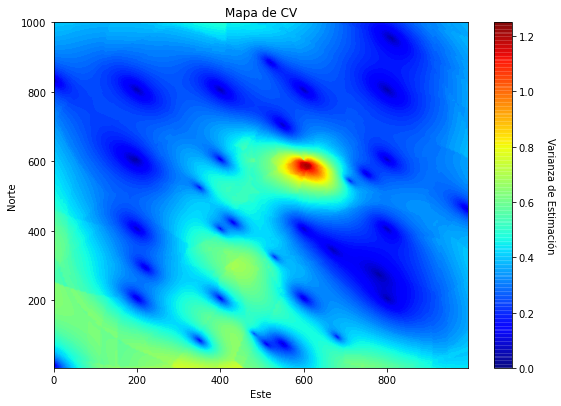

In [206]:
plt.subplot(111)

GSLIB.pixelplt_st(cvko,0,1000,0,1000,5,0,1.25,"Mapa de CV","Este","Norte","Varianza de Estimación",cmap)

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1.2, hspace=0.2, wspace=0.2)

plt.show()

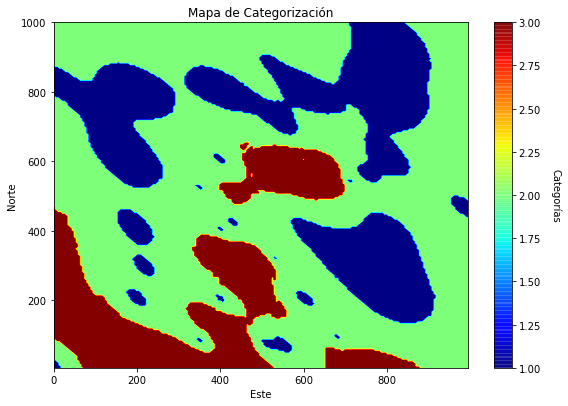

In [204]:
plt.subplot(111)

GSLIB.pixelplt_st(cat_ko,0,1000,0,1000,5,1,3,"Mapa de Categorización","Este","Norte","Categorías",cmap)

plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1.2, hspace=0.2, wspace=0.2)

plt.show()